# ENGSCI762 - Data Science for Engineering Applications

# Get the data (DS05)

## II.1 List the data you need and how much you need.

### California House Pricing (DS05)

Adapted from Geron (2017):

https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

## II.2 Find and document where you can get that data 

In [1]:
config = {'data_repository': "https://raw.githubusercontent.com/ageron/handson-ml/master",
          'data_path': "/datasets/housing/housing.tgz"}
config['download_url'] = config['data_repository'] + config['data_path']
config

{'data_repository': 'https://raw.githubusercontent.com/ageron/handson-ml/master',
 'data_path': '/datasets/housing/housing.tgz',
 'download_url': 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'}

## II.7 Get the data

In [2]:
import os
from six.moves import urllib

config['reference_path'] = "../../data/reference/datasets/housing"

def fetch_housing_data(housing_url=config['download_url'], 
                       housing_path=config['reference_path']):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    return tgz_path

In [3]:
config['local_reference'] = fetch_housing_data()
config['local_reference']

'../../data/reference/datasets/housing/housing.tgz'

## II.8 Convert the data to a format you can easily manipulate

In [4]:
import tarfile
def convert_housing_data(tgz_path=config['local_reference'], 
                        housing_path=config['reference_path']):
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
convert_housing_data()
reference_files = os.listdir(config['reference_path'])
reference_files

['housing.csv', 'housing.tgz']

In [6]:
import fnmatch
csv_files = fnmatch.filter(reference_files, '*.csv')
csv_files

['housing.csv']

In [7]:
config['data_filename'] = csv_files[0]
config['data_filename']

'housing.csv'

## II.9 Check the size and type of data (time series, sample, geographical, etc.).

In [8]:
import pandas as pd
def load_housing_data(housing_path=config['reference_path'],
                      filename=config['data_filename']):
    csv_path = os.path.join(housing_path, filename)
    return pd.read_csv(csv_path)

In [9]:
housing = load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
import numpy as np
np.sum(housing['median_house_value']>=500000)/housing.shape[0]

0.04806201550387597

In [11]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


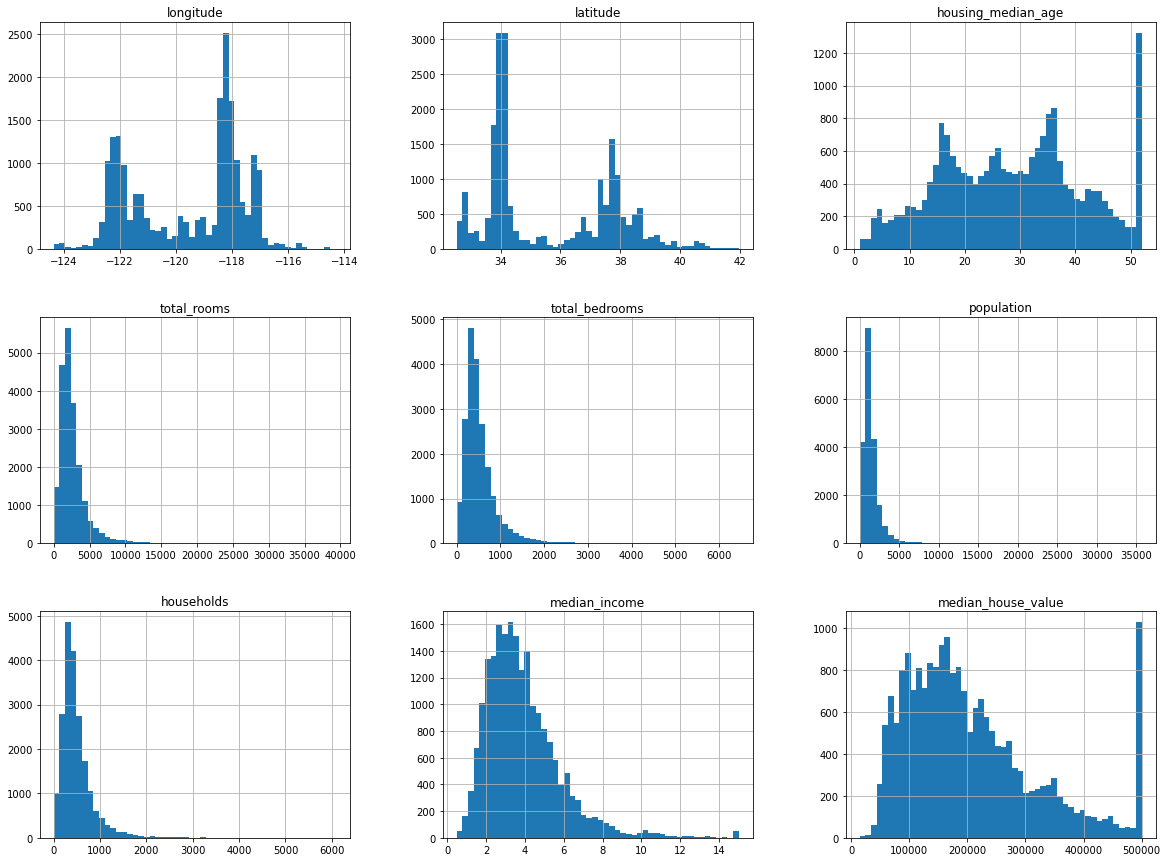

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
_ = housing.hist(bins=50, figsize=(20,15))

## II.11 Sample a test set, put it aside, and never look at it

In [14]:
import numpy as np
housing["value_cat"] = np.ceil(housing["median_house_value"] / 100000)
housing["value_cat"].where(housing["value_cat"] < 5, 5.0, inplace=True)

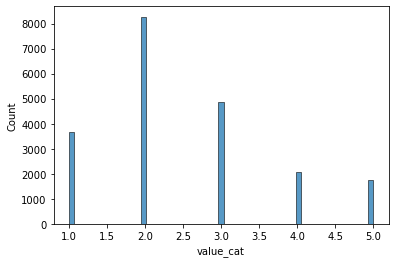

In [15]:
_ = sns.histplot(housing["value_cat"],kde=False)

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["value_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
check_sample = lambda df: df["value_cat"].value_counts() / len(df)

In [19]:
pd.DataFrame(dict([(sample, check_sample(globals()[sample])) for sample in 
                  ("housing", "strat_train_set", "strat_test_set")])
            ).sort_index()

,housing,strat_train_set,strat_test_set
1.0,0.177229,0.177204,0.177326
2.0,0.400824,0.400799,0.400921
3.0,0.236095,0.236131,0.235950
4.0,0.101357,0.101381,0.101260
5.0,0.084496,0.084484,0.084545


Remove the additional value_cat.

In [20]:
for data in (strat_train_set, strat_test_set):
    data.drop(["value_cat"], axis=1, inplace=True)

In [21]:
def save_housing_data(project_path="..",
                      train_set=strat_train_set, 
                      test_set=strat_test_set):
    
    housing_path = os.path.join(project_path, 'data')
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    filepaths = list()
    for data_set in ("train_set", "test_set"):
        csv_path = os.path.join(housing_path, 
                                "{}.csv".format(data_set))
        filepaths.append(csv_path)
        locals()[data_set].to_csv(csv_path)
    return filepaths

In [22]:
save_housing_data()

['../data/train_set.csv', '../data/test_set.csv']

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,value_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,4.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4.0


# III. Explore the data
## III.1 Create a Jupyter notebook

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import dslab

%matplotlib inline
%load_ext autoreload
%autoreload 2


/opt/anaconda3/envs/term121x_env/bin/python
{'numpy': '1.20.1', 'pandas': '1.1.3', 'seaborn': '0.11.0', 'sklearn': '0.23.2', 'matplotlib': '3.3.1'}


## III.2 Study each attribute

Here, we are going to study each attribute.

In [25]:
housing = pd.read_csv('../data/train_set.csv', index_col=0)

In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1862 to 14525
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


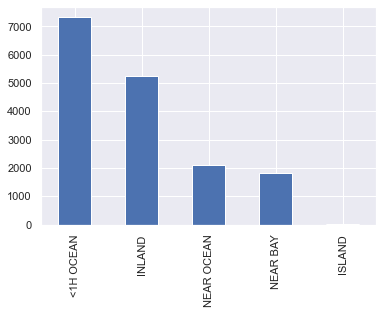

In [31]:
_ = housing.ocean_proximity.value_counts().plot(kind='bar')

In [32]:
from dslab.visualization.visualize import distribution

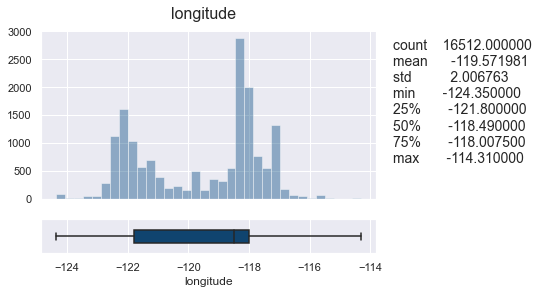

In [33]:
_ = distribution(housing.longitude)

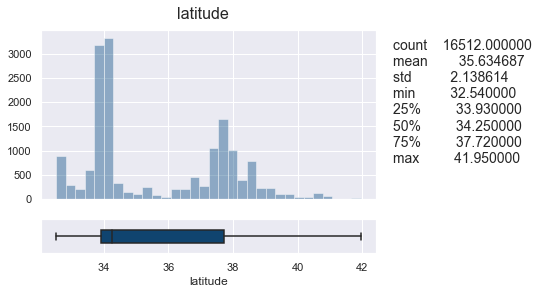

In [34]:
_ = distribution(housing.latitude)

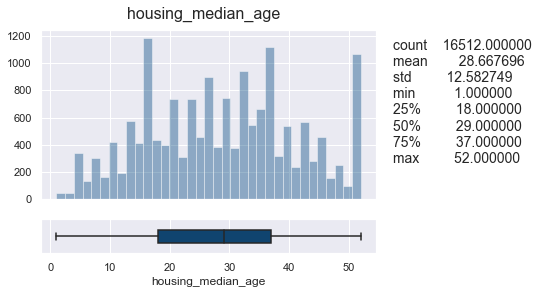

In [35]:
_ = distribution(housing.housing_median_age)

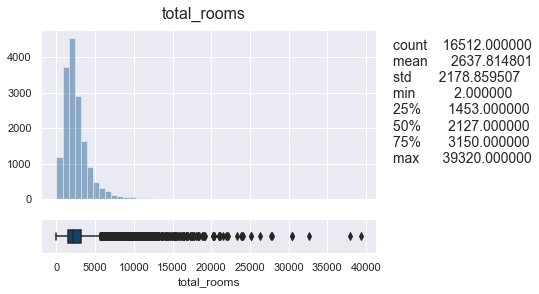

In [36]:
_ = distribution(housing.total_rooms)

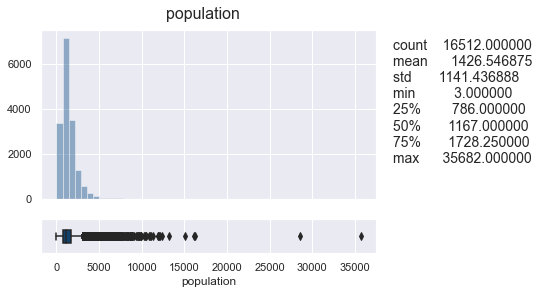

In [37]:
_ = distribution(housing.population)

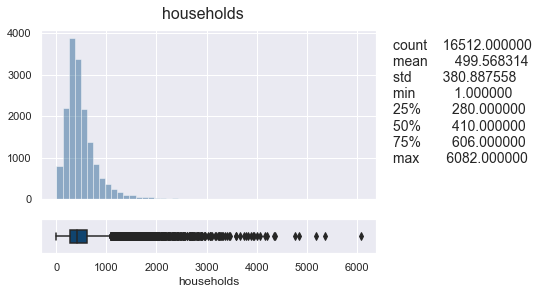

In [38]:
_ = distribution(housing.households)

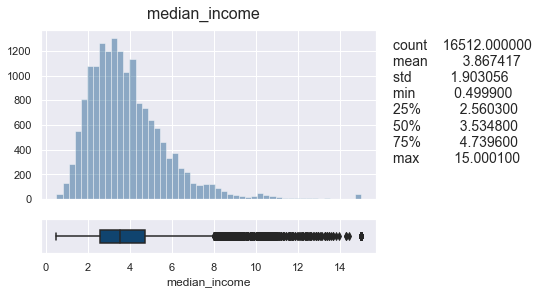

In [39]:
_ = distribution(housing.median_income)

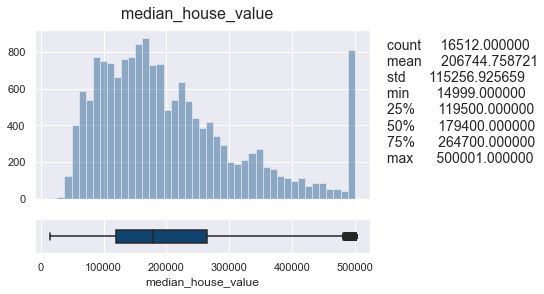

In [40]:
_ = distribution(housing.median_house_value)

## III.3 For supervised learning tasks, identify the target attribute(s)

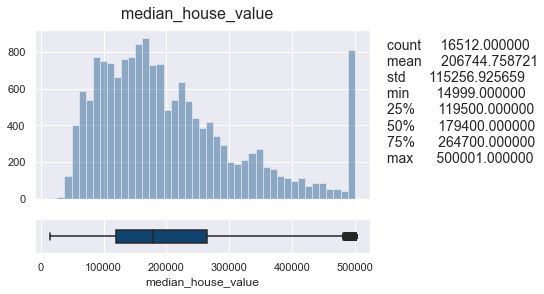

In [41]:
_ = distribution(housing.median_house_value)

## III.4 Visualize the data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

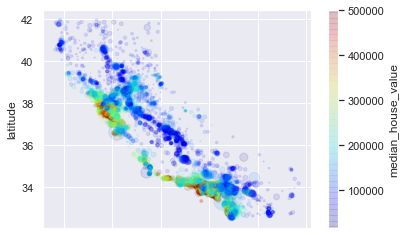

In [47]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
            c="median_house_value", cmap=plt.get_cmap("jet"),
            s=housing['population']/100)

## III.5 Study the correlations between attributes.

In [48]:
corr_matrix = housing.corr()

In [50]:
corr_matrix['median_house_value']

longitude            -0.042825
latitude             -0.147224
housing_median_age    0.104311
total_rooms           0.131758
total_bedrooms        0.044894
population           -0.027218
households            0.062524
median_income         0.691691
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [52]:
df = housing[['median_house_value', 'median_income','total_rooms', 'housing_median_age', 'ocean_proximity']]

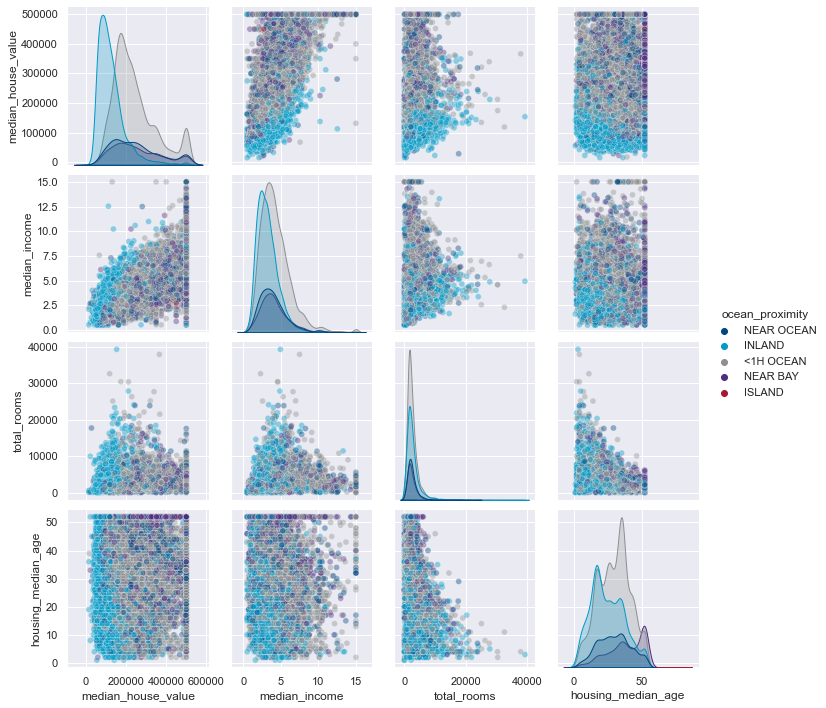

In [53]:
sns.pairplot(df, hue='ocean_proximity', plot_kws={'alpha': 0.4})

## III.6 Engineer features

In [54]:
housing["rooms_per_household"] = housing['total_rooms'] / housing.households

In [55]:
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing.total_rooms

In [56]:
housing['population_per_household'] = housing.population / housing.households

In [57]:
corr_matrix = housing.corr()

In [58]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691691
rooms_per_household         0.145217
total_rooms                 0.131758
housing_median_age          0.104311
households                  0.062524
total_bedrooms              0.044894
population_per_household   -0.021893
population                 -0.027218
longitude                  -0.042825
latitude                   -0.147224
bedrooms_per_room          -0.263606
Name: median_house_value, dtype: float64

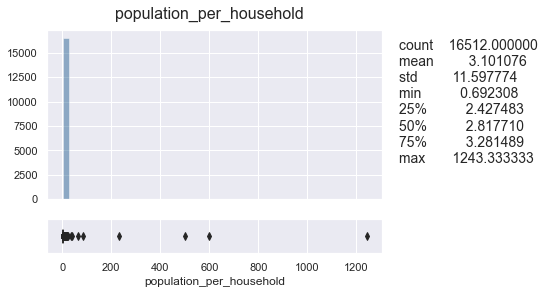

In [59]:
_ = distribution(housing['population_per_household'])

In [60]:
housing['log_population_per_household'] = np.log(housing['population_per_household'])

In [61]:
corr_matrix = housing.corr()

In [62]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value              1.000000
median_income                   0.691691
rooms_per_household             0.145217
total_rooms                     0.131758
housing_median_age              0.104311
households                      0.062524
total_bedrooms                  0.044894
population_per_household       -0.021893
population                     -0.027218
longitude                      -0.042825
latitude                       -0.147224
log_population_per_household   -0.250273
bedrooms_per_room              -0.263606
Name: median_house_value, dtype: float64

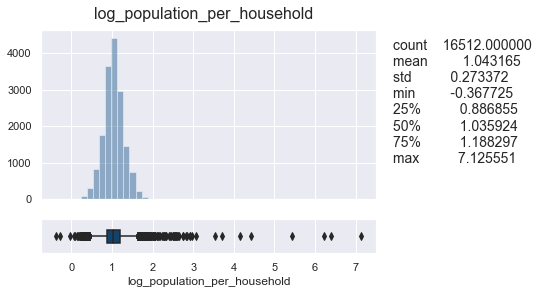

In [63]:
_ = distribution(housing['log_population_per_household'])